In [2]:
import pandas as pd 
import numpy as numpy
import yfinance 
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf



c:\Users\ravis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
google_data = yfinance.download('GOOG', start='2010-01-01', end=datetime.datetime.now().strftime('%Y-%m-%d'))
google_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2010-01-04,15.494032,15.562262,15.431981,15.498976,78541293
2010-01-05,15.425801,15.520977,15.365234,15.504661,120638494
2010-01-06,15.036936,15.472029,14.989966,15.472029,159744526
2010-01-07,14.686881,15.079949,14.651035,15.065116,257533695
2010-01-08,14.882673,14.913080,14.563522,14.634966,189680313


In [4]:
msft = yfinance.download('MSFT', start='2010-01-01', end=datetime.datetime.now().strftime('%Y-%m-%d'))
msft.to_csv('msft_data.csv')
nvda = yfinance.download('NVDA', start='2010-01-01', end=datetime.datetime.now().strftime('%Y-%m-%d'))
nvda.to_csv('nvda_data.csv')
apple = yfinance.download('AAPL', start='2010-01-01', end=datetime.datetime.now().strftime('%Y-%m-%d'))
apple.to_csv('apple_data.csv')
tsla = yfinance.download('TSLA', start='2010-01-01', end=datetime.datetime.now().strftime('%Y-%m-%d'))
tsla.to_csv('tsla_data.csv')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,4034.000000,4034.000000,4034.000000,4034.000000,4.034000e+03
mean,70.986878,71.717635,70.224951,70.948790,5.122476e+07
std,60.973009,61.665784,60.253083,60.935485,4.781042e+07
min,10.780186,10.933705,10.719866,10.835562,1.584340e+05
25%,25.670338,26.001735,25.509363,25.787371,2.308000e+07
50%,51.170961,51.772154,50.516641,51.104457,3.233672e+07
75%,110.779013,111.998496,108.678775,110.442294,6.683597e+07
max,336.429993,341.200012,334.350006,338.054993,5.952147e+08


In [5]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4034 entries, 2010-01-04 to 2026-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   4034 non-null   float64
 1   (High, GOOG)    4034 non-null   float64
 2   (Low, GOOG)     4034 non-null   float64
 3   (Open, GOOG)    4034 non-null   float64
 4   (Volume, GOOG)  4034 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 189.1 KB


In [6]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

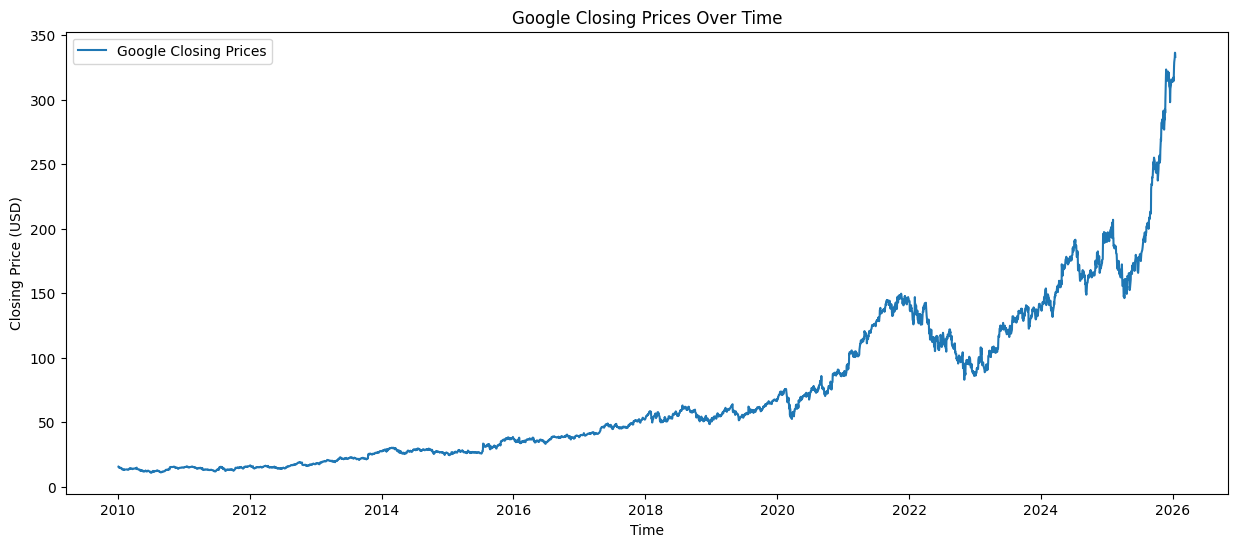

In [7]:
plt.figure (figsize=(15,6))
plt.plot(google_data['Close'], label='Google Closing Prices')
plt.title('Google Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price (USD)')
plt.legend()

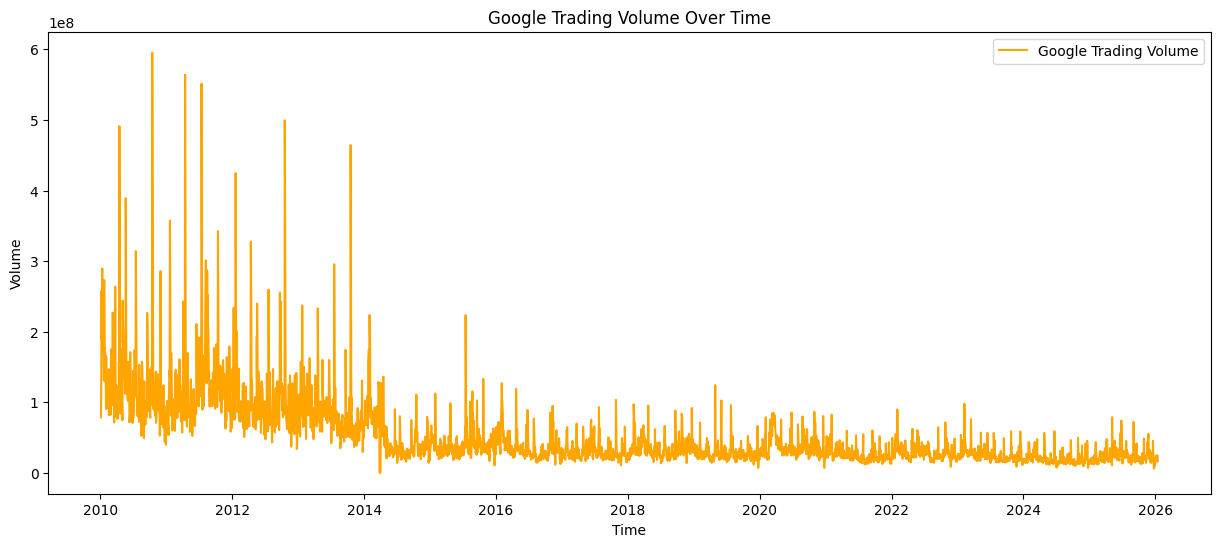

In [8]:
plt.figure(figsize=(15,6))
plt.plot(google_data['Volume'], label='Google Trading Volume', color='orange')
plt.title('Google Trading Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')    
plt.legend()

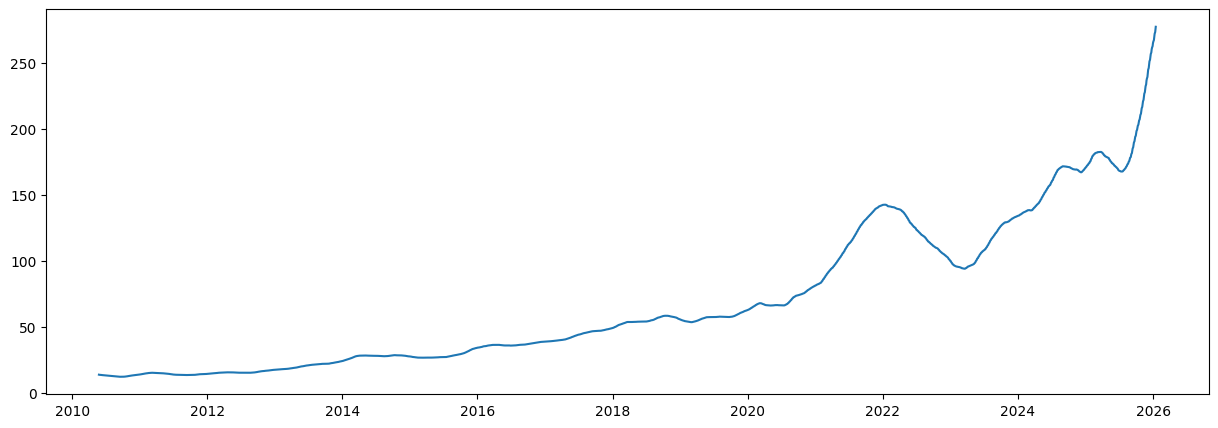

In [11]:
google_data['MA for 100 days '] = google_data['Close'].rolling(window=100).mean()
plt.figure(figsize=(15,5))
plt.plot("MA for 100 days ", data=google_data, label='MA for 100 days ')

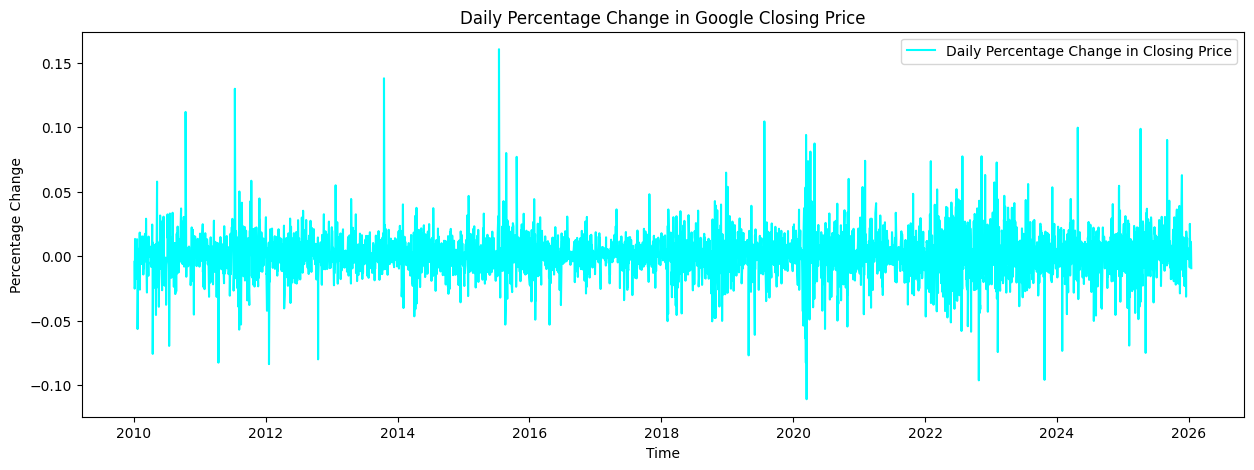

In [12]:
pct_change = google_data['Close'].pct_change()
plt.figure(figsize=(15,5))
plt.plot(pct_change, label='Daily Percentage Change in Closing Price', color='cyan')
plt.title('Daily Percentage Change in Google Closing Price')
plt.xlabel('Time')  
plt.ylabel('Percentage Change')
plt.legend()

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(google_data['Close'])
scaled_data

array([[0.0144752 ],
       [0.01426568],
       [0.01307156],
       ...,
       [1.        ],
       [0.99963152],
       [0.98995857]], shape=(4034, 1))

In [14]:
len(scaled_data)

4034

In [18]:
X_data = []
y_data = []
for i in range(100, len(scaled_data)):
    X_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

from numpy import array
import numpy as np
X_data, y_data = np.array(X_data), np.array(y_data)


In [19]:
X_data, y_data

(array([[[0.0144752 ],
         [0.01426568],
         [0.01307156],
         ...,
         [0.00311929],
         [0.00311246],
         [0.002991  ]],
 
        [[0.01426568],
         [0.01307156],
         [0.01199662],
         ...,
         [0.00311246],
         [0.002991  ],
         [0.00412894]],
 
        [[0.01307156],
         [0.01199662],
         [0.01259785],
         ...,
         [0.002991  ],
         [0.00412894],
         [0.00376228]],
 
        ...,
 
        [[0.58068706],
         [0.58200546],
         [0.60070834],
         ...,
         [0.96800249],
         [0.97761406],
         [0.98863816]],
 
        [[0.58200546],
         [0.60070834],
         [0.60818944],
         ...,
         [0.97761406],
         [0.98863816],
         [1.        ]],
 
        [[0.60070834],
         [0.60818944],
         [0.60447954],
         ...,
         [0.98863816],
         [1.        ],
         [0.99963152]]], shape=(3934, 100, 1)),
 array([[0.00412894],
        [0.

In [42]:
splitting_len = int(len(X_data) * 0.65)
X_train, y_train = X_data[:splitting_len], y_data[:splitting_len]
X_test, y_test = X_data[splitting_len:], y_data[splitting_len:]

In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2557, 100, 1) (2557, 1)
(1377, 100, 1) (1377, 1)


In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=4, batch_size=32)

Epoch 1/4


c:\Users\ravis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 2.6777e-04
Epoch 2/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 1.7542e-05
Epoch 3/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 1.6898e-05
Epoch 4/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 1.6856e-05


In [75]:
predictions = model.predict(X_test)
predictions

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


array([[0.2028675 ],
       [0.20316902],
       [0.2033308 ],
       ...,
       [0.9293881 ],
       [0.9358637 ],
       [0.9425562 ]], shape=(1377, 1), dtype=float32)

In [76]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 76.84395],
       [ 76.94214],
       [ 76.99482],
       ...,
       [313.43524],
       [315.544  ],
       [317.72342]], shape=(1377, 1), dtype=float32)

In [77]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 75.03076172],
       [ 75.94044495],
       [ 74.45855713],
       ...,
       [336.42999268],
       [336.30999756],
       [333.16000366]], shape=(1377, 1))

In [78]:
rmse = np.sqrt(np.mean(((inv_predictions - inv_y_test) ** 2)))

In [79]:
rmse

np.float64(5.885122671315179)

In [80]:
model.save("AlphaStocks AI.keras")